# Steam reforming with water-gas shift

## Known coversion and temperature in steam reforming

Given temperature and conversion of steam reforming (DR), assume exit composition is in equilibrium with respect to water-gas shift (WGS), and determine WGS-conversion $X_{H_2O,WGS}$. 

Parameters: 
* $X_{CH_4}=0.2$
* $T_{DR}=624~^\circ C$ 
* $S/C=2.2$

In [1]:
from numpy import array, log, exp, sqrt, zeros, prod, linspace
from scipy.optimize import bisect
from matplotlib import pyplot as plt

data=[line.split(';') for line in """z_i/(-);h_ig/(J/mol);s_ig/(J/mol/K);g_ig/(J/mol);cp_ig/(J/mol/K);cas_no/();phase/();formula/();formula_name_structure/();ant_name/();poling_no/();poling_formula/();poling_name/();poling_molwt/(g/mol);poling_tfp/(K);poling_tb/(K);poling_tc/(K);poling_pc/(bar);poling_vc/(cm3/mol);poling_zc/();poling_omega/();poling_delhf0/(kJ/mol);poling_delgf0/(kJ/mol);poling_delhb/(kJ/mol);poling_delhm/(kJ/mol);poling_v_liq/(cm3/mol);poling_t_liq/(K);poling_dipole/(Debye);p_ant_a/();p_ant_b/(K);p_ant_c/(K);p_ant_tmin/(K);p_ant_tmax/(K);p_ant_pvpmin/(bar);p_ant_pvpmax/(bar);eant_to/(K);eant_n/();eant_e/();eant_f/();eant_tmin/(K);eant_tmax/(K);eant_pvpmin/(bar);eant_pvpmax/(bar);wagn_a/();wagn_b/();wagn_c/();wagn_d/();wagn_tmin/(K);wagn_tmax/(K);wagn_pvpmin/(bar);wagn_pvpmax/(bar);range_tmin_to_1000/(K);range_1000_to_tmax/(K);molecular_weight/(g/mol);hf298_div_r/();a1_low/();a2_low/(K^-1);a3_low/(K^-2);a4_low/(K^-3);a5_low/(K^-4);a6_low/(K^-1);a7_low/();a1_high/();a2_high/(K^-1);a3_high/(K^-2);a4_high/(K^-3);a5_high/(K^-4);a6_high/(K^-1);a7_high/();reference/();source/();date/();ant_no/();ant_formula/();ant_name/();ant_a/();ant_b/();ant_c/();ant_tmin/(°C);ant_tmax/(°C);ant_code/()
0;0;130,802012845;-38998,6201299;28,8363121833;1333-74-0;G;H2 REF ELEMENT;H2 CALC FROM GURVIC'S TABLE;hydrogen;438;H2;hydrogen;2,016;13,83;20,27;32,98;12,93;64,2;0,303;-0,217;0;0;0,89;0,12;28,39;20;0;2,93954;66,7954;275,65;10,25;22,82;0,05;2;;;;;;;;;;;;;;;;;200;6000;2,01588;0;2,34433112;0,00798052075;-1,9478151e-05;2,01572094e-08;-7,37611761e-12;-917,935173;0,683010238;2,93286575;0,000826608026;-1,46402364e-07;1,54100414e-11;-6,888048e-16;-813,065581;-1,02432865;GURVICH 78;tpis;78;161;H2;hydrogen;6,14858;80,948;277,53;-259,2;-239,97;1,2;
0;-74520;186,034253085;-129986,112557;35,6126668172;74-82-8;G;CH4   RRHO;CH4 METHANE SAME AS THE ANHARMONIC BUT CALCULATED USING THE RRHO METHOD RATHER THAN THE NRRAO2.;methane;26;CH4;methane;16,043;90,69;111,66;190,56;45,992;98,6;0,286;0,011;-74,52;-50,45;8,17;0,94;35,54;90,68;0;3,7687;395,744;266,681;92,64;120,59;0,15;2;;;;;;;;;-6,02242;1,26652;-0,5707;-1,366;;190,55;;45,99;200;6000;16,04246;-8972,26656;5,14825732;-0,013700241;4,93749414e-05;-4,91952339e-08;1,70097299e-11;-10245,3222;-4,63322726;1,911786;0,0096026796;-3,38387841e-06;5,3879724e-10;-3,19306807e-14;-10099,2136;8,48241861;;g;8/99;137;CH4;methane;6,84377;435,4534;271,361;-196,85;-82,59;1,2;
0;-393510;213,789479981;-457251,333456;37,1352585732;124-38-9;G;CO2;CO2 CARBON-DIOXIDE;carbon dioxide;31;CO2;carbon dioxide;44,01;216,58;;304,12;73,74;94,07;0,274;0,225;-393,51;-394,38;;9,02;;;0;;;;;;;;;;;;;;;;;;;;;;;;200;6000;44,0098;-47328,105;2,356813;0,0089841299;-7,1220632e-06;2,4573008e-09;-1,4288548e-13;-48371,971;9,9009035;4,6365111;0,0027414569;-9,9589759e-07;1,6038666e-10;-9,1619857e-15;-49024,904;-1,9348955;GURVICH VOL 2 1991 P.27;L;7/88;164;CO2;carbon dioxide;9,81367;1340,9768;271,883;-119,74;-8,96;1,2;
0;-110530;197,672063199;-169465,925643;29,1409651441;630-08-0;G;CO;CO CARBON-MONOXIDE CALCULATED FROM TSIV TABLE.;carbon monoxide;30;CO;carbon monoxide;28,01;68,15;81,66;132,85;34,94;93,1;0,292;0,045;-110,53;-137,16;6,04;0,84;34,88;81;0,1;3,81912;291,743;267,996;69,73;88,08;0,2;2;;;;;;;;;;;;;;;;;200;6000;28,0104;-13293,628;3,5795335;-0,00061035369;1,0168143e-06;9,0700586e-10;-9,0442449e-13;-14344,086;3,5084093;3,0484859;0,0013517281;-4,8579405e-07;7,8853644e-11;-4,6980746e-15;-14266,117;6,0170977;TSIV 79;RUS;79;161;CO;carbon monoxide;6,72828;295,2279;268,243;-216,7;-140,29;1,2;
0;-241810;188,799783187;-298100,655357;33,58766993;7732-18-5;G;H2O;H2O;water;440;H2O;water;18,015;273,15;373,15;647,14;220,64;55,95;0,229;0,344;-241,81;-228,42;40,66;6,01;18,07;298,15;1,8;5,11564;1687,537;230,17;273,2;473,2;0,01;16;;;;;;;;;-7,77224;1,45684;-2,71942;-1,41336;273,2;647,3;0,01;221;200;6000;18,01528;-29084,817;4,1986352;-0,0020364017;6,5203416e-06;-5,4879269e-09;1,771968e-12;-30293,726;-0,84900901;2,6770389;0,0029731816;-7,7376889e-07;9,4433514e-11;-4,2689991e-15;-29885,894;6,88255;WOOLEY J. RES. NBS 92 (1987), 35.  BASED ON HF298(L) FROM COX, WAGMAN & MEDVEDEV CODATA KEY VAL. FOR THERMO, HEMISPHERE 1989 P.21 AND HEAT OF VAP. FROM HAAR, GALLAGHER & KELL NBS/NRC TABLES, HEMISPHERE 1984.;L;5/89;162;H2O;water;8,05573;1723,6425;233,08;0,01;373,98;1,2;
0;0;191,632621307;-57135,2660428;29,124315278;7727-37-9;G;N2  REF ELEMENT;N2 REFERENCE ELEMENT HF=0. FROM TSIV TABLES;nitrogen;455;N2;nitrogen;28,014;63,15;77,35;126,2;34;90,1;0,289;0,037;0;0;5,58;0,72;34,84;78;0;3,61947;255,68;266,55;60,81;83,65;0,08;2;;;;;;;;;-6,11102;1,2189;-0,69366;-1,89893;;126,2;;34;200;6000;28,0134;0;3,53100528;-0,000123660988;-5,02999433e-07;2,43530612e-09;-1,40881235e-12;-1046,97628;2,96747038;2,95257637;0,0013969004;-4,92631603e-07;7,86010195e-11;-4,60755204e-15;-923,948688;5,87188762;;G;8/02;239;N2;nitrogen;6,72531;285,5727;270,09;-210;-147,05;1,2;
0;0;205,095940942;-61149,3547919;29,3783179536;7782-44-7;G;O2 REF ELEMENT;O2 CALCULATED FROM ORIGINAL VALUES;oxygen;460;O2;oxygen;31,999;54,36;90,17;154,58;50,43;73,37;0,288;;0;0;6,82;0,44;27,85;90;0;3,81634;319,013;266,7;64,29;97,2;0,02;2;;;;;;;;;;;;;;;;;200;6000;31,9988;0;3,78245636;-0,00299673416;9,84730201e-06;-9,68129509e-09;3,24372837e-12;-1063,94356;3,65767573;3,66096065;0,000656365811;-1,41149627e-07;2,05797935e-11;-1,29913436e-15;-1215,97718;3,41536279;GURVICH 1989. CORRECTED BY B.MCBRIDE NASA TP-2002-211556;TPIS;89;271;O2;oxygen;6,83706;339,2095;268,7;-218,8;-118,57;1,2;
0;0;154,846476768;-46167,4770484;20,78625;7440-37-1;G;AR REF ELEMENT;AR;argon;1;Ar;argon;39,948;83,8;87,27;150,86;48,98;74,57;0,291;-0,002;0;0;6,43;;29,1;90;0;3,74141;304,227;267,32;82,59;94,26;0,6;2;;;;;;;;;;;;;;;;;200;6000;39,948;0;2,5;0;0;0;0;-745,375;4,37967491;2,5;0;0;0;0;-745,375;4,37967491;C.E. MOORE ATOMIC ENERGY LEVELS NSRDS-NBS 35 (1971) P.211;g;5/97;15;Ar;argon;6,84064;340,2707;271,8;-189,37;-122,29;1,2;
0;0;126,153545211;-37612,6795046;20,78625;7440-59-7;G;He REF ELEMENT;HE;helium-4;450;He;helium;4,003;2,15;4,3;5,19;2,27;57,3;0,301;-0,39;0;0;0,08;;32,54;4,3;0;1,6836;8,1548;273,71;1,85;5,34;0,02;2;;;;;;;;;;;;;;;;;200;6000;4,0026;0;2,5;0;0;0;0;-745,375;0,928723974;2,5;0;0;0;0;-745,375;0,928723974;;g;5/97;175;He;helium-4;5,2712;13,5171;274,58;-271,39;-267,95;1,2;
0;82880;268,325246538;2878,82774459;81,934398014;71-43-2;G;C6H6;[F&W NOTATION A1] C6H6 BENZENE;benzene;187;C6H6;benzene;78,114;278,68;353,24;562,05;48,98;256;0,268;0,21;82,88;129,75;30,72;9,95;89,41;298,15;0;3,98523;1184,24;217,572;279,64;377,06;0,05;2;;;;;;;;;-7,01433;1,55256;-1,8479;-3,713;;562,16;;48,98;200;6000;78,11184;9968,11598;0,504818632;0,0185020642;7,38345881e-05;-1,18135741e-07;5,07210429e-11;8552,47913;21,6412893;11,0809576;0,0207176746;-7,52145991e-06;1,22320984e-09;-7,36091279e-14;4306,41035;-40,041331;SHIMANOUCHI AND PLIVA ET AL J. MOLEC. SPETROS 107,(1984),209;g;6/01;2460;C6H6;benzene;6,81432;1090,4312;197,146;-9,6;103,04;1,2;
0;-123100;295,971523164;-211343,909631;105,342922613;110-82-7;G;C6H12,cyclo-;C6H12 CYCLOHEXANE;cyclohexane;197;C6H!2;cyclohexane;84,161;279,69;353,93;553,5;40,73;308;0,273;0,211;-123,1;32,26;29,97;2,63;108,75;298,15;0,3;3,93002;1182,774;220,618;282,11;378,46;0,06;2;25;3,40407;10,048;-126,96;378,15;553,15;1,9871;40,48;;;;;;;;;200;6000;84,15948;-14829,4969;4,04357527;-0,00619608335;0,000176622274;-2,22968474e-07;8,63668578e-11;-16920,3544;8,52527441;13,214597;0,0358243434;-1,32110852e-05;2,17202521e-09;-1,31730622e-13;-22809,2102;-55,3518322;DOROFEEVA GURVICH & JORISH JPCRD 15 (1986) 437;g;6/90;2823;C6H12;cyclohexane;6,88938;1200,8256;218,815;-14,92;105,07;1,2;
0;-166920;387,462696222;-282442,002879;142,590479962;110-54-3;G;C6H14,n-hexane;C6H14 N-HEXANE;hexane;216;c6hm;hexane;86,177;177,84;341,88;507,6;30,35;368;0,264;0,3;-166,92;0,15;28,85;13,07;131,59;298,15;0;4,00139;1170,875;224,317;254,24;365,25;0,02;2;;;;;;;;;-7,53998;1,83759;-2,5438;-3,163;;507,9;;30,35;200;6000;86,17536;-20075,7471;9,87121167;-0,00936699002;0,000169887865;-2,1501952e-07;8,45407091e-11;-23718,5495;-12,4999353;19,5158086;0,0267753942;-7,49783741e-06;1,19510646e-09;-7,51957473e-14;-29436,2466;-77,4895497;;g;6/01;3139;C6H14;hexane;6,98978;1216,9154;227,451;-24,29;92,12;1,2;
0;-200940;240,19493704;-272554,120478;42,9167106558;67-56-1;G;CH3OH Methyl alc;CH4O METHANOL (CH3OH);methyl alcohol;27;ch4o;methanol;32,042;175,49;337,69;512,64;80,92;118;0,224;0,565;-200,94;-162,24;35,21;3,18;40,73;298,15;1,7;5,20277;1580,08;239,5;262,59;356;0,02;2;;;;;;;;;-8,63571;1,17982;-2,479;-1,024;;512,64;;80,92;200;6000;32,04216;-24174,6056;5,65851051;-0,0162983419;6,91938156e-05;-7,58372926e-08;2,8042755e-11;-25611,9736;-0,897330508;3,52726795;0,0103178783;-3,62892944e-06;5,77448016e-10;-3,42182632e-14;-26002,8834;5,16758693;CHEN WILHOIT & ZWOLINSKI JPCRD 6,(1977),105;T;06/02;144;CH4O;methyl alcohol;8,08404;1580,4585;239,096;-15,99;199,45;1,2;
0;-352400;285,738660054;-437592,981495;62,4363045378;107-31-3;G;C2H4O2 methylfor;C2H4O2 METHYLFORMATE HCOOCH3;methyl formate;61;C2H4O2;methyl methanoate (methyl formate);60,053;174,15;304,9;487,2;60;172;0,255;;-352,4;-294,9;27,92;;62,14;298,15;1,8;4,29529;1125,2;230,56;230,3;324,29;0,02;2;;;;;;;;;;;;;;;;;200;6000;60,05196;-43032,7223;5,96757028;-0,00938085425;7,07648417e-05;-8,29932227e-08;3,13522917e-11;-44870,9982;0,750341113;6,3336088;0,0134851485;-4,84305805e-06;7,81719241e-10;-4,67917447e-14;-46131,3237;-6,91542601;ATCT C 2011;T;7/11;460;C2H4O2;methyl formate;7,05336;1138,3109;236,959;-48,91;214,05;1,2;
0;-378600;246,867144773;-452203,439214;41,3052664729;64-18-6;G;HCOOH FORMIC ACID;CH2O2 METHANOIC (FORMIC) ACID HCOOH MONOMER;formic acid;22;ch2o2;methanoic acid (formic acid);46,026;281,5;374,04;588;58,07;;;0,316;-378,6;-35,06;22,69;12,72;;;1,5;;;;;;;;;;;;;;;;-7,24917;0,44255;-0,35558;-0,96906;;588;;58,07;200;6000;46,02568;-45531,246;3,8983616;-0,0035587795;3,5520538e-05;-4,3849959e-08;1,7107769e-11;-46770,609;7,3495397;4,6138316;0,0064496364;-2,2908251e-06;3,6716047e-10;-2,1873675e-14;-47514,85;0,84788383;CHAO & ZWOLINSKI JPCRD 7.(1978),363;L;8/88;108;CH2O2;formic acid;6,96405;1162,8529;184,037;8,4;314,85;1,2;
0;-83820;228,779508382;-152030,610424;52,5009107486;74-84-0;G;C2H6;C2H6 ETHANE;ethane;65;C2H6;ethane;30,07;90,35;184,55;305,32;48,71;145,5;0,279;0,099;-83,82;-31,86;14,7;2,86;46,15;90,36;0;3,95405;663,72;256,681;133,8;198,16;0,02;2;;;;;;;;;-6,475;1,41071;-1,144;-1,859;;305,33;;48,71;200;6000;30,06904;-10084,9652;4,29142572;-0,00550154901;5,99438458e-05;-7,08466469e-08;2,68685836e-11;-11522,2056;2,66678994;4,04666411;0,0153538802;-5,47039485e-06;8,77826544e-10;-5,23167531e-14;-12447,3499;-0,968698313;CHAO WILHOIT & ZWOLINSKI JPCRD 2,(1973), 427;g;8/88;491;C2H6;ethane;6,95185;698,9298;260,264;-142,83;32,17;1,2;
0;52500;218,878873835;-12758,7362338;42,8868953326;74-85-1;G;C2H4;C2H4 ETHYLENE;ethylene;55;C2H4;ethene (ethylene);28,054;103,99;169,42;282,34;50,41;131,1;0,282;0,087;52,5;68,48;13,53;3,35;51,07;183,15;0;3,91382;596,526;256,37;123,06;181,9;0,02;2;-99;2,79132;9,717;52,77;188,15;273,15;2,71;40,99;;;;;;;;;200;6000;28,05316;6314,26266;3,95920063;-0,00757051373;5,70989993e-05;-6,91588352e-08;2,6988419e-11;5089,77598;4,09730213;3,99182724;0,0104833908;-3,71721342e-06;5,94628366e-10;-3,53630386e-14;4268,65851;-0,269081762;CHAO & ZWOLINSKY, JPCRD 4,(1975),251;g;1/00;428;C2H4;ethylene;6,96867;649,8057;262,73;-169,15;9,2;1,2;
0;-104680;269,715634825;-185095,716523;73,5887322571;74-98-6;G;C3H8;C3H8 PROPANE CH3CH2CH3;propane;95;C3H8;propane;44,097;91,45;231,02;369,83;42,47;200;0,276;0,152;-104,68;-24,29;19,04;3,53;74,87;233,15;0;3,92828;803,997;247,04;168,9;247,76;0,02;2;;;;;;;;;-6,76368;1,55481;-1,5872;-2,024;;369,85;;42,47;200;6000;44,09562;-12590,0384;4,21093013;0,00170886504;7,06530164e-05;-9,20060565e-08;3,64618453e-11;-14381,0883;5,61004451;6,6691976;0,0206108751;-7,36512349e-06;1,18434262e-09;-7,0691463e-14;-16275,4066;-13,1943379;CHAO WILHOIT & ZWOLINSKI JPCRD 2, (1973),427;g;2/00;959;C3H8;propane;7,02022;889,8642;257,084;-109,27;96,74;1,2;
0;20000;266,234106556;-59377,6988696;64,4333605623;115-07-1;G;C3H6 propylene;C3H6 PROPYLENE;propylene;85;C3H6;propene (propylene);42,081;87,89;225,46;364,9;46;184,6;0,28;0,142;20;62,5;18,42;3;;;0,4;3,95606;789,624;247,58;165,2;241,61;0,02;2;-41;2,67417;22,13;-199,34;238,15;363,15;1,74;44,67;;;;;;;;;200;6000;42,07974;2405,43339;3,83464468;0,00329078952;5,05228001e-05;-6,66251176e-08;2,63707473e-11;788,717123;7,53408013;6,03870234;0,0162963931;-5,821308e-06;9,35936829e-10;-5,58603143e-14;-741,715057;-8,43825992;CHAO & ZWOLINSKI JPCRD 4,(1975) 251;g;2/00;883;C3H6;propylene;7,00725;859,722;255,895;-112,78;91,06;1,2;
0;-20630;205,781166808;-81983,6548839;34,2548560182;7783-06-4;G;H2S anharmonic;H2S ANHARMONIC;hydrogen sulfide;441;H2S;hydrogen sulfide;34,082;187,62;212,84;373,4;89,63;98;0,283;0,09;-20,63;-33,43;18,68;2,38;34,32;214;0,9;4,22882;806,933;251,39;185,51;227,2;0,2;2;;;;;;;;;;;;;;;;;200;6000;34,08188;-2477,59639;4,12024455;-0,00187907426;8,2142665e-06;-7,0642573e-09;2,1423486e-12;-3682,15173;1,53174068;2,9787943;0,00359760372;-1,22803151e-06;1,96833209e-10;-1,16716162e-14;-3516,07638;6,77921228;GURVICH 1989;g;4/01;164;H2S;hydrogen sulfide;7,11958;802,2266;249,61;-85,47;100,38;1,2;
0;nan;311,477408685;nan;90,2348916052;7664-93-9;G;H2SO4;H2SO4 SULFURIC ACID;sulfuric acid;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;200;6000;98,07948;-88123,0524;4,53388173;0,0310347679;-4,10421795e-05;2,95752341e-08;-8,81459071e-12;-90545,9072;3,93961412;11,3355392;0,00560829109;-1,94574192e-06;3,07136054e-10;-1,81109544e-14;-92108,7435;-29,6094003;DOROFEEVA ET AL JPCRD 32 (2003),879 . CALCULATED FROM ORIGINAL TABLES.;T;8/03;165;H2SO4;sulfuric acid;8,28538;2976,837;213,95;25;336,85;1,2;
0;-395720;256,536422994;-472206,334516;50,6194285115;7446-11-9;G;SO3;SO3;sulfur trioxide;463;O3S;sulfur trioxide;80,064;289,95;317,9;490,9;82,1;126,5;0,254;;-395,72;-370,93;40,69;7,53;42,1;298,15;;6,17575;1735,31;236,5;284,5;332,04;0,15;2;;;;;;;;;;;;;;;;;200;6000;80,0642;-47615,554;2,37461122;0,0159543297;-1,26322543e-05;2,81827264e-09;6,23371547e-13;-48926,9231;13,1043046;7,29677572;0,00273576437;-1,06377755e-06;1,80776031e-10;-1,12077527e-14;-50309,6739;-12,4246659;GURVICH 89;tpis;89;361;SO3;sulfur trioxide;6,85638;754,8178;145,11;16,8;217,7;1,2;
0;-296810;248,127032091;-370789,074618;39,8424312772;7446-09-5;G;SO2;SO2 O-S-O;sulfur dioxide;461;O2S;sulfur dioxide;64,065;197,67;263,13;430,8;78,84;122;0,269;;-296,81;-300,14;24,94;7,4;44,03;263,15;1,6;4,4072;999,9;237,19;199,71;279,47;0,02;2;;;;;;;;;;;;;;;;;200;6000;64,0648;-35697,8343;3,67480752;0,00228302107;8,46893049e-06;-1,36562039e-08;5,76271873e-12;-36945,5073;7,9686643;5,38423482;0,0016793056;-6,32062944e-07;1,08465348e-10;-6,66890336e-15;-37606,7022;-1,83130517;GURVICH 89;tpis;89;356;SO2;sulfur dioxide;7,33311;1013,4609;237,65;-75,48;157,6;1,2;
T=298,15 K;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
""".split('\n')]
#df=pd.DataFrame(data)
#df.rename(columns=df.iloc[0])
#new_header=df.iloc[0]
#df=df[1:]
#df.columns=new_header

names=[item[7] for item in data[1:-2] if len(item[21])>0]  # exclude sulfuric acid with no entry on col. 21
delhf0=array([item[21].replace(',','.') for item in data[1:-2] if len(item[21])>0],dtype=float).T*1000  # exclude sulfuric acid with no entry on col. 21
delhg0=array([item[22].replace(',','.') for item in data[1:-2] if len(item[21])>0],dtype=float).T*1000  # exclude sulfuric acid with no entry on col. 21
a_low=array([[x.replace(',','.') for x in item[55:62]] for item in data[1:-2] if len(item[21])>0],dtype=float).T  # exclude sulfuric acid with no entry on col. 21
a_high=array([[x.replace(',','.') for x in item[62:69]] for item in data[1:-2] if len(item[21])>0],dtype=float).T  # exclude sulfuric acid with no entry on col. 21

R=8.3145 # J/mol/K

def therm_ig(t=298.15):
    """Returns thermodynamic properties of ideal gas at temperature t in K, based on NASA polynomials.
    Input: temperature in K.
    Output: h_ig/(J/mol), s_ig/(J/mol/K), g_ig/(J/mol), cp/(J/mol/K)
    """
    if t>1000: # poly a_low is for 200 - 1000 K; a_high is for 1000 - 6000 K
        a=a_high
    else:
        a=a_low
    
    cp_r=[sum([a[j][i]*t**j for j in range(4+1)]) for i in range(len(names))] # cp/R
    
    cp_ig=[R*cp_r[i] for i in range(len(names))] # J/mol/K
    s_cp_r_dt=[
    sum([1/(j+1)*a[j][i]*t**(j+1) for j in range(4+1)]) 
    -sum([1/(j+1)*a_low[j][i]*298.15**(j+1) for j in range(4+1)]) 
    for i in range(len(names))] # int(Cp/R*dT,298,15K,T)
    # int(Cp/R/T*dT,298.15K,T)
    s_cp_r_t_dt=[a[0][i]*log(t)+a[6][i]+
    sum([1/(j)*a[j][i]*t**(j) for j in range(1,3+1)])
    for i in range(len(names))] # int(Cp/(RT)*dT,0,T)

    h_ig=[delhf0[i]+R*s_cp_r_dt[i] for i in range(len(names))]
    s_ig=[R*s_cp_r_t_dt[i] for i in range(len(names))]
    g_ig=[h_ig[i]-t*s_ig[i] for i in range(len(names))]
    
    return h_ig,s_ig,g_ig,cp_ig

therm_ig(1000)

([20686.626894893176,
  -36385.27598061155,
  -360112.8226573553,
  -88839.93960027723,
  -215807.36501521352,
  21464.68067196319,
  22706.912993333346,
  14588.829562500001,
  14588.829562500001,
  195641.0081010494,
  37038.003752955585,
  10407.966001303255,
  -152833.92798258207,
  -281316.8411186896,
  -335540.43022776,
  -19409.66565972384,
  103138.895685806,
  -12254.578656265556,
  97508.82157894841,
  7445.125720528566,
  -348669.0926679975,
  -262470.16195549676],
 [181.5686500191445,
  212.1735085501309,
  269.5842720725006,
  236.42563008638112,
  229.05279803848896,
  231.1048428669693,
  236.84499369775233,
  180.00113520693745,
  151.30820364956546,
  342.30156937679214,
  367.9127322395452,
  495.47559182285755,
  259.49341403767585,
  335.15762180194724,
  281.5564421205502,
  275.7564914769493,
  244.21791761137004,
  341.4333385076708,
  335.62879576391714,
  248.32657968432588,
  333.2881006827243,
  293.65777758757054],
 [-160882.02312425134,
  -248558.7845307424

(H2O+CH4, S/C=2.2) -->> DR (X_CH4=0,2) -->> WGS (GGW) -->> Prod

        (0)               (1)                 (2)
        
$\begin{align}y_{0,CH_4}=\frac{1}{1+2,2}=0,3125\\
y_{0,H_2O}=\frac{2,2}{1+2,2}=0,6875\end{align}$

DR, $X_{CH_4}$ fixed

$\tilde{y}_{i,DR}=\frac{\tilde{y}_{i,0}+\tilde{y}_{CH_4,0}\frac{\nu_{i,DR}}{-\nu_{CH_4,DR}}X_{CH_4}}{1+\underbrace{\tilde{y}_{CH_4,0}\frac{\sum_i(\nu_{i,DR})}{-\nu_{CH_4,DR}}}_{\epsilon_{CH_4}}X_{CH_4}}$

WGS, Equilibrium at $T_{DR}$ fixed

$K(T)=exp\left(\frac{-\Delta_R G^\circ(T)}{R T}\right)=K_\phi \frac{(\tilde{y}_{CO_2}p/p^\circ)(\tilde{y}_{H_2}p/p^\circ)}{(\tilde{y}_{CO}p/p^\circ)(\tilde{y}_{H_2O}p/p^\circ)}=1\cdot\frac{(\tilde{y}_{CO_2,DR}+\tilde{y}_{H_2O,DR}X_{H_2O,WGS})(\tilde{y}_{H_2,DR}+\tilde{y}_{H_2O,DR}X_{H_2O,WGS})}{(\tilde{y}_{CO,DR}-\tilde{y}_{H_2O,DR}X_{H_2O,WGS})(\tilde{y}_{H_2O,DR}-\tilde{y}_{H_2O,DR}X_{H_2O,WGS})}$

$\Rightarrow 0=(1-K(T))\cdot X_{H_2O,WGS}^2+\left(\frac{\tilde{y}_{CO_2,DR}}{\tilde{y}_{H_2O,DR}}+\frac{\tilde{y}_{H_2,DR}}{\tilde{y}_{H_2O,DR}}+K(T)\cdot\left(\frac{\tilde{y}_{CO,DR}}{\tilde{y}_{H_2O,DR}}+1\right)\right)\cdot X_{H_2O,WGS}+\frac{\tilde{y}_{CO_2,DR}\cdot\tilde{y}_{H_2,DR}}{\tilde{y}_{H_2O,DR}^2}-K(T)\frac{\tilde{y}_{CO,DR}}{\tilde{y}_{H_2O,DR}}$

(solve quadratic for $X_{H_2O,WGS} \Rightarrow \tilde{y}_{i,WGS}$)

In [2]:
sc=2.2 # steam to carbon
X_ch4=0.2 # CH4 conversion
T=(624+273.15) # temperature in DR

nu=zeros([len(names),2]) # stoich. coefficients
nu[:5,0]=[3,-1,0,1,-1] # H2O+CH4->CO+3H2
nu[:5,1]=[1,0,1,-1,-1] # CO+H2O->CO2+H2

h,s,g,cp=therm_ig(T) # ideal gas therm. properties
delta_r_g=nu.T.dot(g) # Gibbs free energy change, both reactions

y0=zeros(len(names))
y0_ch4=1/(1+sc)
nu_ch4=nu[2-1,0]
y0[2-1]=1/(1+sc) # methane
y0[5-1]=sc/(1+sc) # steam

y_dr=(y0+y0[2-1]*nu[:,0]/-nu[2-1,0]*X_ch4)/(1+y0[2-1]*sum(nu[:,0])/-nu[2-1,0]*X_ch4) # exit composition of DR
K=exp(-delta_r_g/(R*T))
a=1-K[1]
b=y_dr[3-1]/y_dr[5-1]+y_dr[1-1]/y_dr[5-1]+K[1]*(y_dr[4-1]/y_dr[5-1]+1)
c=y_dr[1-1]*y_dr[3-1]/y_dr[5-1]**2-K[1]*y_dr[4-1]/y_dr[5-1]
r1,r2=[(-b+sqrt(b**2-4*a*c))/(2*a),(-b-sqrt(b**2-4*a*c))/(2*a)]
X_h2o_wgs=r1
y_dr_wgs=(y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)/(1+y_dr[5-1]*sum(nu[:,1])/-nu[5-1,1]*X_h2o_wgs) # exit composition of WGS after DR
print('{:10.6s}{:10.10s}{:10.10s}'.format('i','y_dr_i','y_WGS_i'))
for i,name in enumerate(names):
    print('{:10.6s}{:10.5g}{:10.5g}'.format(name,y_dr[i],y_dr_wgs[i]))
print('\nX(CH_4,DR)={:0.5g}, X(H_2O,WGS)={:0.5g}'.format(X_ch4,X_h2o_wgs))

i         y_dr_i    y_WGS_i   
H2 REF       0.16667   0.21968
CH4          0.22222   0.22222
CO2                0   0.05301
CO          0.055556 0.0025456
H2O          0.55556   0.50255
N2  RE             0         0
O2 REF             0         0
AR REF             0         0
He REF             0         0
C6H6               0         0
C6H12,             0         0
C6H14,             0         0
CH3OH              0         0
C2H4O2             0         0
HCOOH              0         0
C2H6               0         0
C2H4               0         0
C3H8               0         0
C3H6 p             0         0
H2S an             0         0
SO3                0         0
SO2                0         0

X(CH_4,DR)=0.2, X(H_2O,WGS)=0.095418


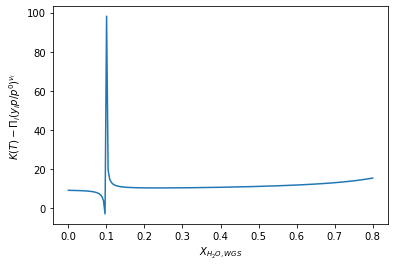

In [3]:
f=lambda X_h2o_wgs: K[1]-prod((y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)**nu[:,1])
x=linspace(0,0.8,200)
plt.plot(x,[f(x_var) for x_var in x])
plt.xlabel('$X_{H_2O, WGS}$')
plt.ylabel(r'$K(T)-\Pi_i(y_i p/p^0)^{\nu_i}$');

In [4]:
[f(0.0975),f(0.99)]

[-8.074363783167664, 152.59730355786436]

In [5]:
bisect(lambda X_h2o_wgs: K[1]-prod((y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)**nu[:,1]),0.0975,0.99)

0.09999999999872217

In [6]:
a=1-K[1]
b=y_dr[3-1]/y_dr[5-1]+y_dr[1-1]/y_dr[5-1]+K[1]*(y_dr[4-1]/y_dr[5-1]+1)
c=y_dr[1-1]*y_dr[3-1]/y_dr[5-1]**2-K[1]*y_dr[4-1]/y_dr[5-1]
r1,r2=[(-b+sqrt(b**2-4*a*c))/(2*a),(-b-sqrt(b**2-4*a*c))/(2*a)]
[r1,r2,f(r1),f(r2)]

[0.09541797107625707,
 1.1773592172360177,
 9.237055564881302e-14,
 8.881784197001252e-15]

In [7]:
sc=2.2 # steam to carbon
X_ch4=0.5 # CH4 conversion
T=(624+273.15) # temperature in DR

nu=zeros([len(names),2]) # stoich. coefficients
nu[:5,0]=[3,-1,0,1,-1] # H2O+CH4->CO+3H2
nu[:5,1]=[1,0,1,-1,-1] # CO+H2O->CO2+H2

h,s,g,cp=therm_ig(T) # ideal gas therm. properties
delta_r_g=nu.T.dot(g) # Gibbs free energy change, both reactions

y0=zeros(len(names))
y0_ch4=1/(1+sc)
nu_ch4=nu[2-1,0]
y0[2-1]=1/(1+sc) # methane
y0[5-1]=sc/(1+sc) # steam

y_dr=(y0+y0[2-1]*nu[:,0]/-nu[2-1,0]*X_ch4)/(1+y0[2-1]*sum(nu[:,0])/-nu[2-1,0]*X_ch4) # exit composition of DR
K=exp(-delta_r_g/(R*T))
a=1-K[1]
b=y_dr[3-1]/y_dr[5-1]+y_dr[1-1]/y_dr[5-1]+K[1]*(y_dr[4-1]/y_dr[5-1]+1)
c=y_dr[1-1]*y_dr[3-1]/y_dr[5-1]**2-K[1]*y_dr[4-1]/y_dr[5-1]
r1,r2=[(-b+sqrt(b**2-4*a*c))/(2*a),(-b-sqrt(b**2-4*a*c))/(2*a)]
X_h2o_wgs=r1
y_dr_wgs=(y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)/(1+y_dr[5-1]*sum(nu[:,1])/-nu[5-1,1]*X_h2o_wgs) # exit composition of WGS after DR
print('{:10.6s}{:10.10s}{:10.10s}'.format('i','y_dr_i','y_WGS_i'))
for i,name in enumerate(names):
    print('{:10.6s}{:10.5g}{:10.5g}'.format(name,y_dr[i],y_dr_wgs[i]))
print('\nX(CH_4,DR)={:0.5g}, X(H_2O,WGS)={:0.5g}'.format(X_ch4,X_h2o_wgs))

i         y_dr_i    y_WGS_i   
H2 REF       0.35714   0.45919
CH4          0.11905   0.11905
CO2                0   0.10204
CO           0.11905  0.017004
H2O          0.40476   0.30272
N2  RE             0         0
O2 REF             0         0
AR REF             0         0
He REF             0         0
C6H6               0         0
C6H12,             0         0
C6H14,             0         0
CH3OH              0         0
C2H4O2             0         0
HCOOH              0         0
C2H6               0         0
C2H4               0         0
C3H8               0         0
C3H6 p             0         0
H2S an             0         0
SO3                0         0
SO2                0         0

X(CH_4,DR)=0.5, X(H_2O,WGS)=0.25211


In [8]:
sc=2.2 # steam to carbon
X_ch4=0.8 # CH4 conversion
T=(624+273.15) # temperature in DR

nu=zeros([len(names),2]) # stoich. coefficients
nu[:5,0]=[3,-1,0,1,-1] # H2O+CH4->CO+3H2
nu[:5,1]=[1,0,1,-1,-1] # CO+H2O->CO2+H2

h,s,g,cp=therm_ig(T) # ideal gas therm. properties
delta_r_g=nu.T.dot(g) # Gibbs free energy change, both reactions

y0=zeros(len(names))
y0_ch4=1/(1+sc)
nu_ch4=nu[2-1,0]
y0[2-1]=1/(1+sc) # methane
y0[5-1]=sc/(1+sc) # steam

y_dr=(y0+y0[2-1]*nu[:,0]/-nu[2-1,0]*X_ch4)/(1+y0[2-1]*sum(nu[:,0])/-nu[2-1,0]*X_ch4) # exit composition of DR
K=exp(-delta_r_g/(R*T))
a=1-K[1]
b=y_dr[3-1]/y_dr[5-1]+y_dr[1-1]/y_dr[5-1]+K[1]*(y_dr[4-1]/y_dr[5-1]+1)
c=y_dr[1-1]*y_dr[3-1]/y_dr[5-1]**2-K[1]*y_dr[4-1]/y_dr[5-1]
r1,r2=[(-b+sqrt(b**2-4*a*c))/(2*a),(-b-sqrt(b**2-4*a*c))/(2*a)]
X_h2o_wgs=r1
y_dr_wgs=(y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)/(1+y_dr[5-1]*sum(nu[:,1])/-nu[5-1,1]*X_h2o_wgs) # exit composition of WGS after DR
print('{:10.6s}{:10.10s}{:10.10s}'.format('i','y_dr_i','y_WGS_i'))
for i,name in enumerate(names):
    print('{:10.6s}{:10.5g}{:10.5g}'.format(name,y_dr[i],y_dr_wgs[i]))
print('\nX(CH_4,DR)={:0.5g}, X(H_2O,WGS)={:0.5g}'.format(X_ch4,X_h2o_wgs))

i         y_dr_i    y_WGS_i   
H2 REF           0.5   0.61946
CH4         0.041667  0.041667
CO2                0   0.11946
CO           0.16667  0.047207
H2O          0.29167   0.17221
N2  RE             0         0
O2 REF             0         0
AR REF             0         0
He REF             0         0
C6H6               0         0
C6H12,             0         0
C6H14,             0         0
CH3OH              0         0
C2H4O2             0         0
HCOOH              0         0
C2H6               0         0
C2H4               0         0
C3H8               0         0
C3H6 p             0         0
H2S an             0         0
SO3                0         0
SO2                0         0

X(CH_4,DR)=0.8, X(H_2O,WGS)=0.40958


## Known conversion in steam reforming and water-gas shift

Determine $T_{DR}$ for known conversions of both reactions, assuming WGS is in equilibrium.

Parameters: 
* $X_{CH_4}=0.5$
* $X_{H_2O,WGS}=0.2148$ 
* $S/C=2.2$

In [9]:
def f(T,K):
    h,s,g,cp=therm_ig(T) # ideal gas therm. properties
    delta_r_g=nu[:,1].T.dot(g) # Gibbs free energy change, both reactions
    return K-exp(-delta_r_g/(R*T))

In [10]:
sc=2.2 # steam to carbon
X_ch4=0.5 # CH4 conversion

nu=zeros([len(names),2]) # stoich. coefficients
nu[:5,0]=[3,-1,0,1,-1] # H2O+CH4->CO+3H2
nu[:5,1]=[1,0,1,-1,-1] # CO+H2O->CO2+H2

y0=zeros(len(names))
y0_ch4=1/(1+sc)
nu_ch4=nu[2-1,0]
y0[2-1]=1/(1+sc) # methane
y0[5-1]=sc/(1+sc) # steam

y_dr=(y0+y0[2-1]*nu[:,0]/-nu[2-1,0]*X_ch4)/(1+y0[2-1]*sum(nu[:,0])/-nu[2-1,0]*X_ch4) # exit composition of DR

X_h2o_wgs=0.08694375/y_dr[5-1]
K=prod((y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)**nu[:,1])
T_wgs=-34783/8.3145/(-31.762/8.3145-log(K))-273.15

print('\nX(CH_4,DR)={:0.5g}, X(H_2O,WGS)={:0.5g}, T(WGS)={:0.5g} °C'.format(X_ch4,X_h2o_wgs,T_wgs))
y_dr_wgs=(y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)/(1+y_dr[5-1]*sum(nu[:,1])/-nu[5-1,1]*X_h2o_wgs) # exit composition of WGS after DR
print('{:10.6s}{:10.10s}{:10.10s}'.format('i','y_dr_i','y_WGS_i'))
for i,name in enumerate(names):
    print('{:10.6s}{:10.5g}{:10.5g}'.format(name,y_dr[i],y_dr_wgs[i]))


X(CH_4,DR)=0.5, X(H_2O,WGS)=0.2148, T(WGS)=539.02 °C
i         y_dr_i    y_WGS_i   
H2 REF       0.35714   0.44409
CH4          0.11905   0.11905
CO2                0  0.086944
CO           0.11905  0.032104
H2O          0.40476   0.31782
N2  RE             0         0
O2 REF             0         0
AR REF             0         0
He REF             0         0
C6H6               0         0
C6H12,             0         0
C6H14,             0         0
CH3OH              0         0
C2H4O2             0         0
HCOOH              0         0
C2H6               0         0
C2H4               0         0
C3H8               0         0
C3H6 p             0         0
H2S an             0         0
SO3                0         0
SO2                0         0


In [11]:
-34783/8.3145/(-31.762/8.3145-log(K))-273.15

539.0218185242246

In [12]:
K

3.7841641473578553

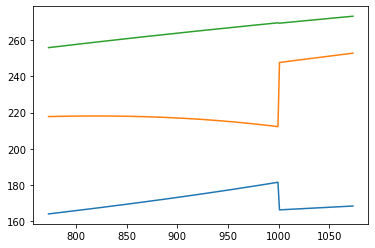

In [13]:
def g(T):
    h,s,g,cp=therm_ig(T) # ideal gas therm. properties
    return s
x=linspace(500,800,200)+273.15
y=[g(x_var)[0:3] for x_var in x]
plt.plot(x,y)

In [14]:
K

3.7841641473578553

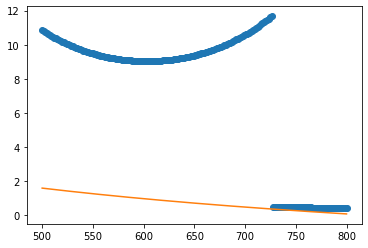

In [15]:
x=linspace(500,800,200)+273.15
y=[K-f(x_var,K) for x_var in x]
plt.plot(x-273.15,y,'o')
plt.plot(x-273.15,-(-34783+31.762*x)/(R*x))

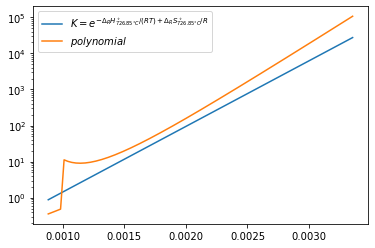

In [16]:
T=linspace(298.15,860+273.15,30) # K

# 726,85 °C = 1000 K
DeltaG=(-395.886+0-(-192.590-200.275))*1000 # J/mol
DeltaH=(-394.623+0-(-247.857-111.983))*1000 # J/mol
DeltaS=(DeltaH-DeltaG)/(726.85+273.15) # J/mol/K

plt.semilogy(1/T,exp(-DeltaH/(R*T)+DeltaS/R),label=r'$K=e^{-\Delta_R H^\circ_{726.85°C}/(R T)+\Delta_R S^\circ_{726.85°C}/R}$') # ref. 800°C

def g(T):
    h,s,g,cp=therm_ig(T) # ideal gas therm. properties
    return nu[:,1].dot(g)
y=array([g(x_var) for x_var in T])

plt.semilogy(1/T,exp(-y/(R*T)),label=r'$polynomial$') # ref. 800°C
plt.legend();

In [17]:
sc=2.2 # steam to carbon
X_ch4=0.8 # CH4 conversion

nu=zeros([len(names),2]) # stoich. coefficients
nu[:5,0]=[3,-1,0,1,-1] # H2O+CH4->CO+3H2
nu[:5,1]=[1,0,1,-1,-1] # CO+H2O->CO2+H2

y0=zeros(len(names))
y0_ch4=1/(1+sc)
nu_ch4=nu[2-1,0]
y0[2-1]=1/(1+sc) # methane
y0[5-1]=sc/(1+sc) # steam

y_dr=(y0+y0[2-1]*nu[:,0]/-nu[2-1,0]*X_ch4)/(1+y0[2-1]*sum(nu[:,0])/-nu[2-1,0]*X_ch4) # exit composition of DR
X_h2o_wgs=0.07455594/y_dr[5-1]
K=prod((y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)**nu[:,1])
T_wgs=-34783/8.3145/(-31.762/8.3145-log(K))-273.15

(-394.623+0-(-247.857-111.983))*1000

print('\nX(CH_4,DR)={:0.5g}, X(H_2O,WGS)={:0.5g}, T(WGS)={:0.5g} °C'.format(X_ch4,X_h2o_wgs,T_wgs))
y_dr_wgs=(y_dr+y_dr[5-1]*nu[:,1]/-nu[5-1,1]*X_h2o_wgs)/(1+y_dr[5-1]*sum(nu[:,1])/-nu[5-1,1]*X_h2o_wgs) # exit composition of WGS after DR
print('{:10.6s}{:10.10s}{:10.10s}'.format('i','y_dr_i','y_WGS_i'))
for i,name in enumerate(names):
    print('{:10.6s}{:10.5g}{:10.5g}'.format(name,y_dr[i],y_dr_wgs[i]))


X(CH_4,DR)=0.8, X(H_2O,WGS)=0.25562, T(WGS)=639.9 °C
i         y_dr_i    y_WGS_i   
H2 REF           0.5   0.57456
CH4         0.041667  0.041667
CO2                0  0.074556
CO           0.16667  0.092111
H2O          0.29167   0.21711
N2  RE             0         0
O2 REF             0         0
AR REF             0         0
He REF             0         0
C6H6               0         0
C6H12,             0         0
C6H14,             0         0
CH3OH              0         0
C2H4O2             0         0
HCOOH              0         0
C2H6               0         0
C2H4               0         0
C3H8               0         0
C3H6 p             0         0
H2S an             0         0
SO3                0         0
SO2                0         0


In [18]:
K

2.1420178207218914

In [19]:
prod(y_dr_wgs**nu[:,1])

2.1420178207218914